<a href="https://colab.research.google.com/github/Bhavaz/Python/blob/master/DL/DL6/6_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 5s - loss: 0.5089 - acc: 0.4513 - val_loss: 0.4081 - val_acc: 0.4880
Epoch 2/5
 - 5s - loss: 0.3847 - acc: 0.4915 - val_loss: 0.3724 - val_acc: 0.4904
Epoch 3/5
 - 5s - loss: 0.3642 - acc: 0.4954 - val_loss: 0.3578 - val_acc: 0.4920
Epoch 4/5
 - 5s - loss: 0.3484 - acc: 0.4988 - val_loss: 0.3424 - val_acc: 0.5007
Epoch 5/5
 - 5s - loss: 0.3375 - acc: 0.5008 - val_loss: 0.3341 - val_acc: 0.4974


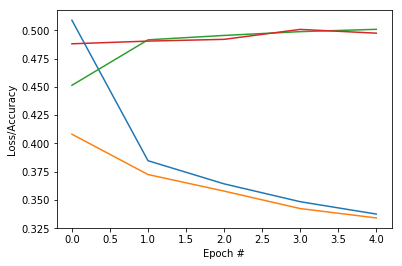

In [0]:
from keras.layers import Input, Dense, regularizers
from keras.models import Model

# use Matplotlib
import matplotlib.pyplot as plt
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
hidden_size = 128
# this is our input placeholder
input_img = Input(shape=(784,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_1)



# "decoded" is the lossy reconstruction of the input
hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                verbose=2,
                shuffle=True,
                validation_data=(x_test, x_test))


N=5
plt.figure()
plt.plot(np.arange(0, N), autoencode.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), autoencode.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), autoencode.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), autoencode.history["val_acc"], label="test_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

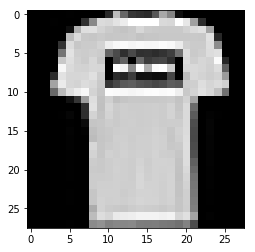

In [0]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.show()

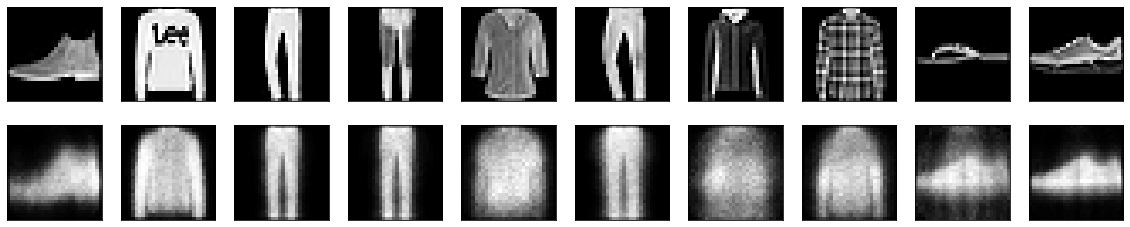

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# use Matplotlib
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()